## To predict total Profit by using features like money spent on indivdual expenses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Domain Analysis

1) R&D Spend:The amount spent on Research and Development — innovation, product design, technology upgrades, etc.
2) Administration: Costs related to general operations(alaries for admin staff, office expenses, legal services)
3) Marketing Spend :Investment in promoting the product or service — advertising, digital marketing, events, etc.
4) State: The geographic location (e.g., Karnataka, Maharashtra) where the startup operates or is registered
5) Profit :The net earnings after all expenses have been deducted from revenue — a key indicator of success.                                                   

In [2]:
d=pd.read_csv('50_Startups_LR.csv')

In [3]:
d

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
d.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
#Rename Columns
d.columns=['R_DSpend','Administration','MarketingSpend','State','Profit']

In [6]:
d.head()

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
d.tail()

,R_DSpend,Administration,MarketingSpend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_DSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
d.describe()

,R_DSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Exploratory Data Analysis

In [10]:
d.head()

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
d.isnull().sum()

R_DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

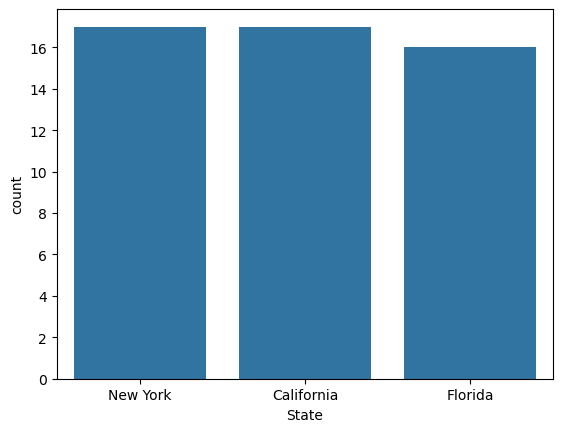

In [12]:
# Analysimg States
sns.countplot(x='State',data=d)
plt.show()

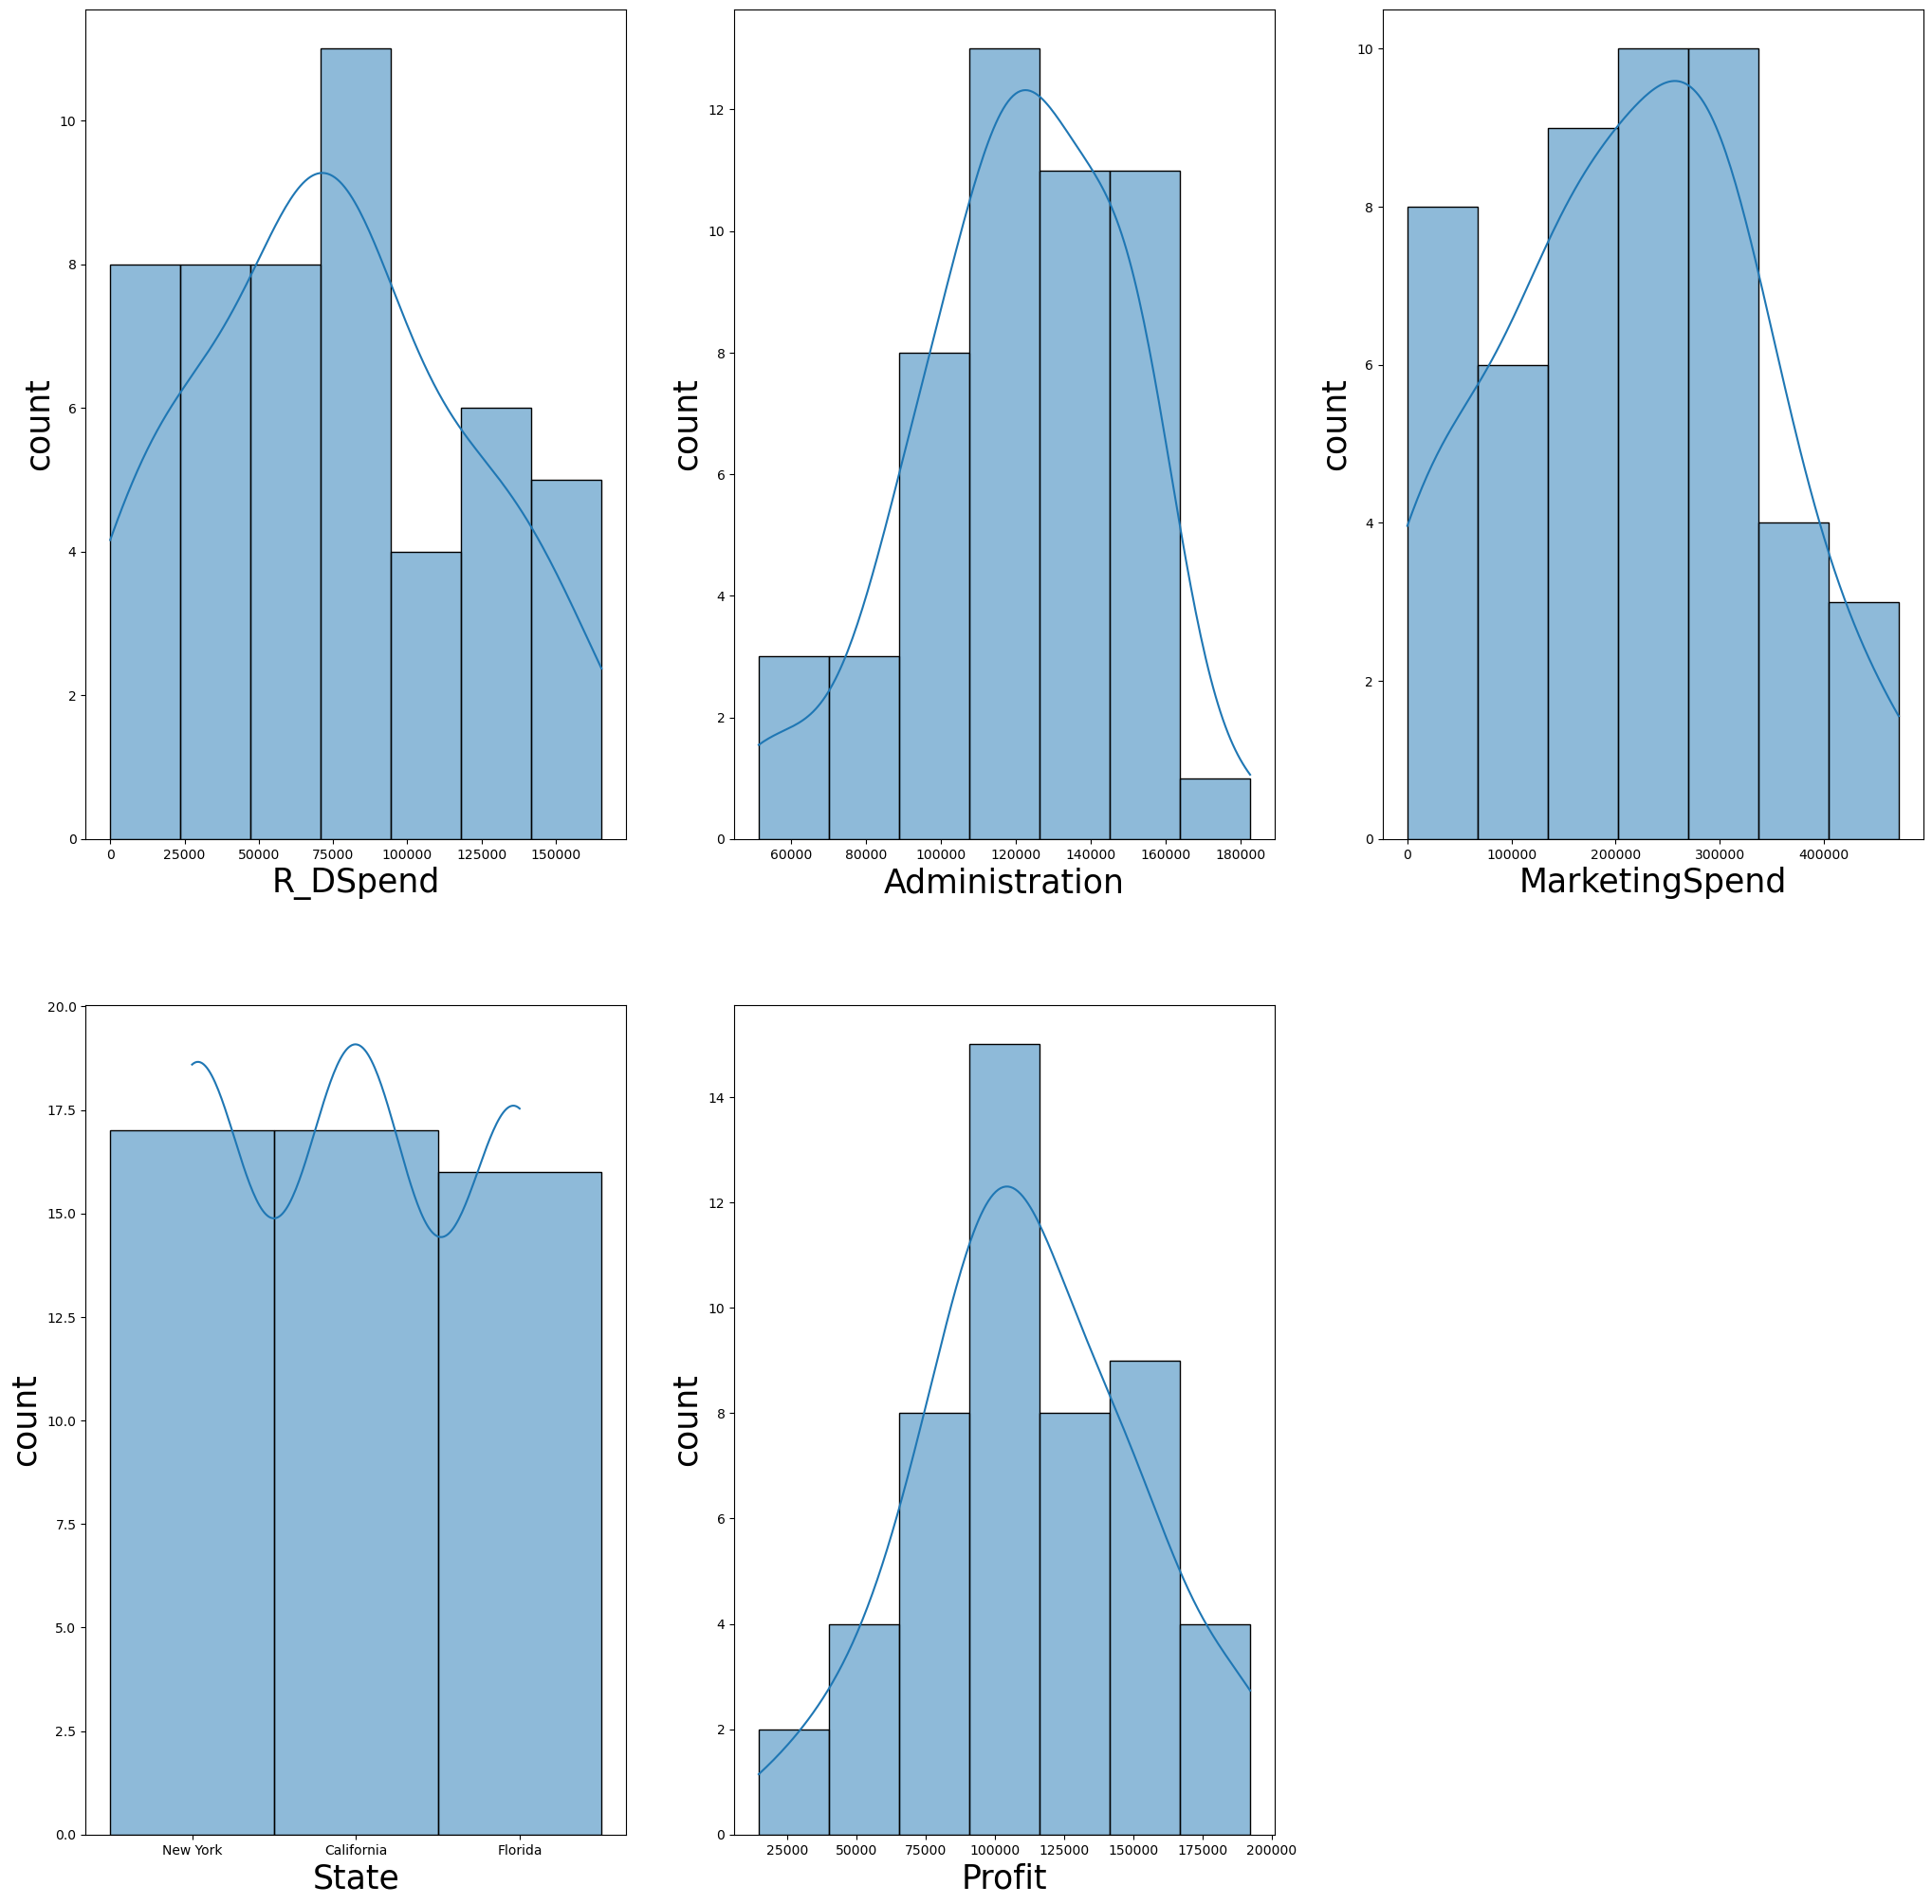

In [13]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in d:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.histplot(d[column],kde=True)
        plt.xlabel(column,fontsize=25)
        plt.ylabel('count',fontsize=25)
        plotnumber+=1
    plt.tight_layout

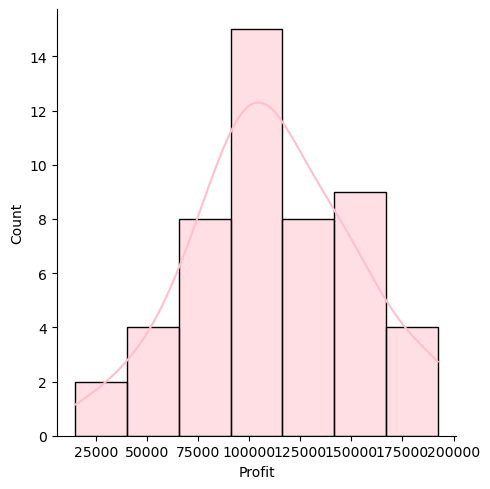

In [14]:
sns.displot(x=d.Profit,kde=True,color='pink')
plt.show()

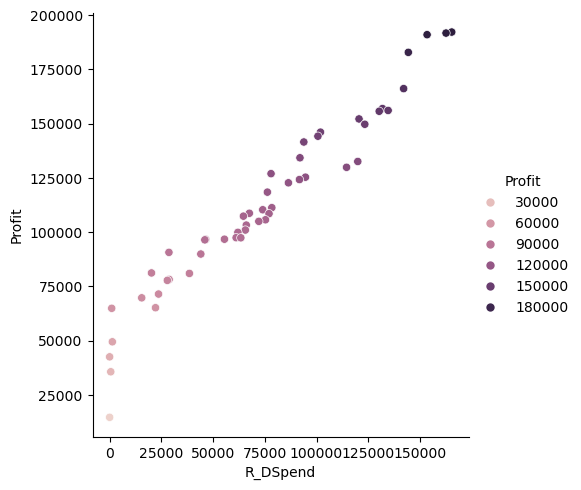

In [15]:
## Aanlyzing the relationship between R&D Spend and Profit.
sns.relplot(x='R_DSpend',y='Profit',hue='Profit',data=d)
plt.show()

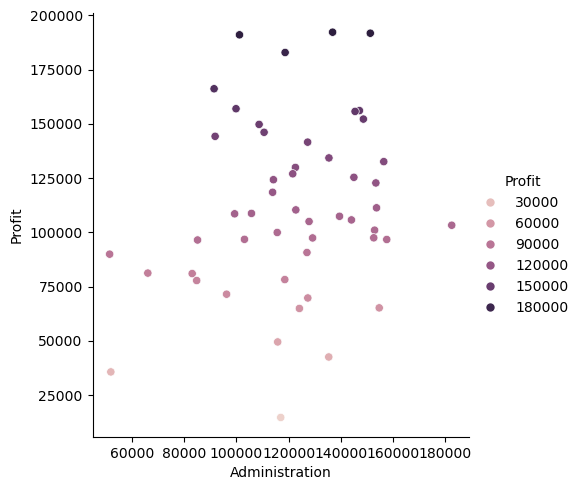

In [16]:
## Aanlyzing the relationship between Administration Spend and Profit.
sns.relplot(x='Administration',y='Profit',hue='Profit',data=d)
plt.show()

In [ ]:
There is no any specific relation between Cost spend on administration and profit . 

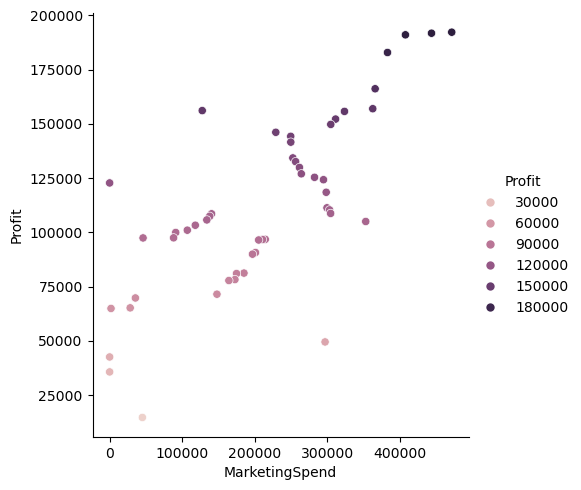

In [17]:
## Aanlyzing the relationship between Marketing Spend and Profit.
sns.relplot(x='MarketingSpend',y='Profit',hue='Profit',data=d)
plt.show()

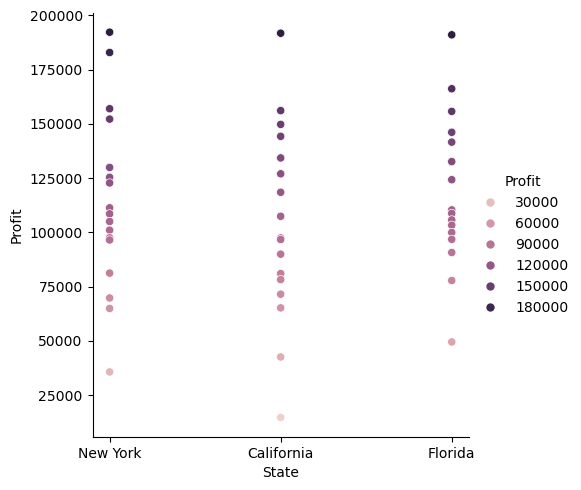

In [18]:
## Aanlyzing the relationship between Marketing Spend and Profit.
sns.relplot(x='State',y='Profit',hue='Profit',data=d)
plt.show()

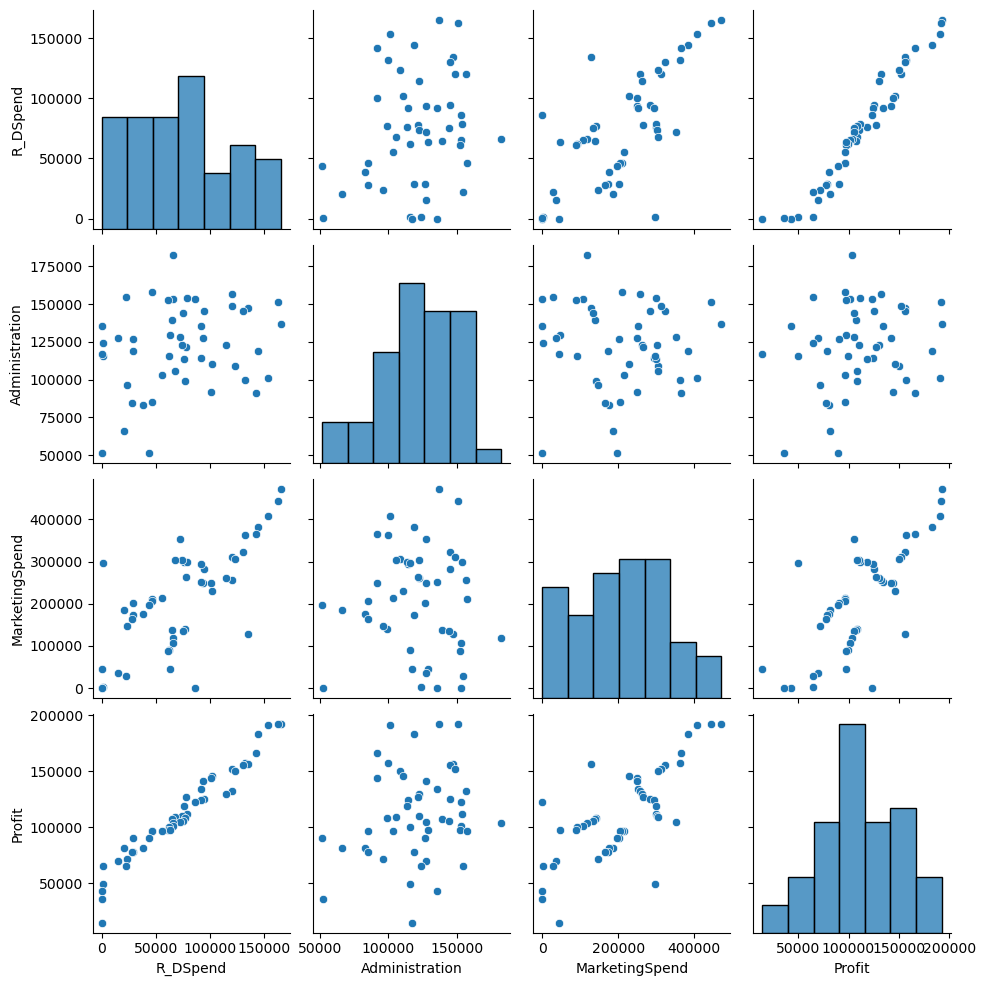

In [19]:
## Step 3 Multivariate Analysizing
sns.pairplot(d)
plt.show()

# Data Preprocessing and Feature Engineering.

In [20]:
 # Handling the missing values
d.isnull().sum()

R_DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [21]:
d.describe()

,R_DSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
# Handling the corrupted data
## In 'R_DSpend ', 'MarketingSpend'certain datapoints are zero.

In [23]:
# count of zero values in R_DSpend.
len(d.loc[d['R_DSpend']==0])

2

In [24]:
# count of zero values in MarketingSpend.
len(d.loc[d['MarketingSpend']==0])

3

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
d.R_DSpend.replace(0,np.mean(d.R_DSpend),inplace=True)
d.MarketingSpend.replace(0,np.mean(d.MarketingSpend),inplace=True)

In [27]:
len(d.loc[d['R_DSpend']==0])
len(d.loc[d['MarketingSpend']==0])

0

In [28]:
d.head()

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


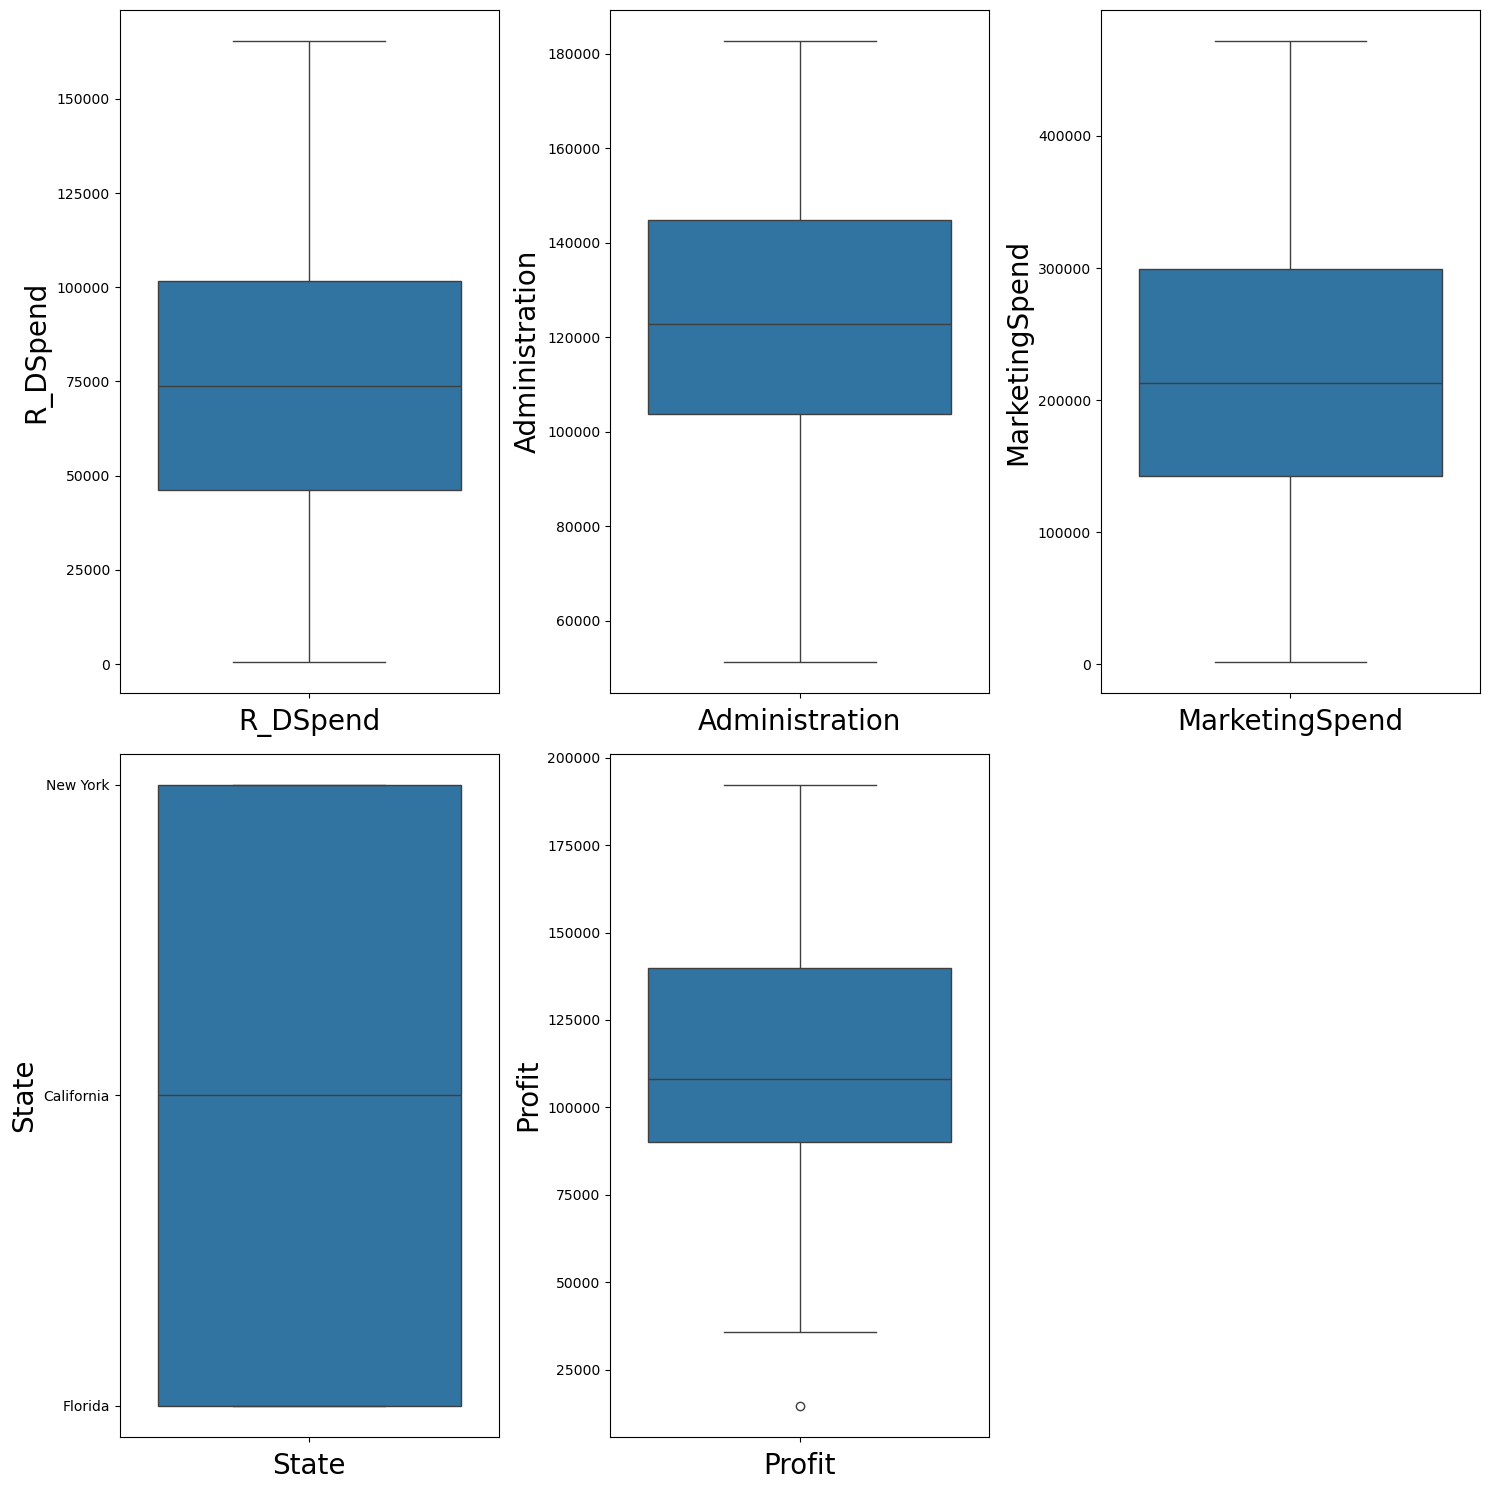

In [29]:
#Checking the outliers
plt.figure(figsize=(15,15),facecolor='White')
plotnumber=1
for column in d:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(d[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [30]:
d.describe()

,R_DSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,76670.480224,121344.639600,223686.603668,112012.639200
std,43316.419335,28017.802755,109840.387216,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,46117.032500,103730.875000,142431.385000,90138.902500
50%,73858.087800,122699.795000,212829.953900,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_DSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [32]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
d1=['State']
df=scaling.fit_transform(d.drop(d1,axis=1))


In [33]:
df

array([[ 2.06801568,  0.56075291,  2.28164088,  2.01120333],
       [ 2.00384983,  1.08280658,  2.02518985,  1.99942997],
       [ 1.7903246 , -0.72825703,  1.69444524,  1.98084225],
       [ 1.57883033, -0.09636463,  1.46696933,  1.77662724],
       [ 1.52600818, -1.07991935,  1.31034106,  1.35774012],
       [ 1.2874311 , -0.77623907,  1.27992752,  1.12724963],
       [ 1.35129518,  0.93214721, -0.88259085,  1.10548055],
       [ 1.25061369,  0.87198001,  0.92140298,  1.09620987],
       [ 1.02310979,  0.9869521 ,  0.80862211,  1.00746967],
       [ 1.0882285 , -0.45664025,  0.74763363,  0.94602247],
       [ 0.58866538, -0.38759909,  0.0503451 ,  0.85484675],
       [ 0.55972207, -1.0655396 ,  0.23964319,  0.80816756],
       [ 0.40095247,  0.21544906,  0.24051585,  0.74115484],
       [ 0.35731176,  0.51017895,  0.26650061,  0.55874952],
       [ 1.00913439,  1.26919939,  0.30188884,  0.51602637],
       [ 0.88274691,  0.04586785,  0.35029313,  0.44871967],
       [ 0.03131055,  0.

In [34]:
d.columns

Index(['R_DSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [35]:
df1=pd.DataFrame(df,columns=['R_DSpend', 'Administration', 'MarketingSpend', 'Profit'])

In [36]:
df1.describe()

,R_DSpend,Administration,MarketingSpend,Profit
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.665335e-17,-2.564615e-16,-2.575717e-16,-5.151435e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.775339e+00,-2.525994e+00,-2.039635e+00,-2.439313e+00
25%,-7.125160e-01,-6.350458e-01,-7.472676e-01,-5.481991e-01
50%,-6.558588e-02,4.885871e-02,-9.984372e-02,-1.011113e-01
75%,5.814296e-01,8.471792e-01,6.969373e-01,6.955535e-01
max,2.068016e+00,2.210141e+00,2.281641e+00,2.011203e+00


In [37]:
condata=d[['State']]

In [38]:
condata

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [39]:
data=pd.concat([df1,condata],axis=1)

In [40]:
data

,R_DSpend,Administration,MarketingSpend,Profit,State
0,2.068016,0.560753,2.281641,2.011203,New York
1,2.003850,1.082807,2.025190,1.999430,California
2,1.790325,-0.728257,1.694445,1.980842,Florida
3,1.578830,-0.096365,1.466969,1.776627,New York
4,1.526008,-1.079919,1.310341,1.357740,Florida
5,1.287431,-0.776239,1.279928,1.127250,New York
6,1.351295,0.932147,-0.882591,1.105481,California
7,1.250614,0.871980,0.921403,1.096210,Florida
8,1.023110,0.986952,0.808622,1.007470,New York
9,1.088229,-0.456640,0.747634,0.946022,California


In [41]:
data.describe()

,R_DSpend,Administration,MarketingSpend,Profit
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.665335e-17,-2.564615e-16,-2.575717e-16,-5.151435e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.775339e+00,-2.525994e+00,-2.039635e+00,-2.439313e+00
25%,-7.125160e-01,-6.350458e-01,-7.472676e-01,-5.481991e-01
50%,-6.558588e-02,4.885871e-02,-9.984372e-02,-1.011113e-01
75%,5.814296e-01,8.471792e-01,6.969373e-01,6.955535e-01
max,2.068016e+00,2.210141e+00,2.281641e+00,2.011203e+00


# Feature Selection

<Axes: >

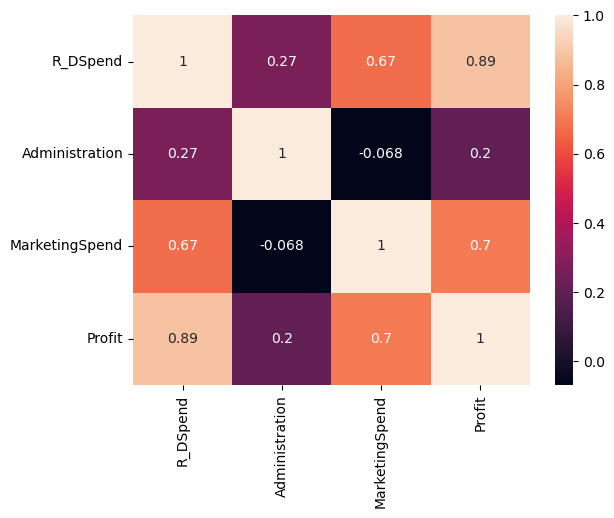

In [42]:
## We will check correlation

sns.heatmap(df1.corr(),annot=True)

# Model Creation

In [43]:
data

,R_DSpend,Administration,MarketingSpend,Profit,State
0,2.068016,0.560753,2.281641,2.011203,New York
1,2.003850,1.082807,2.025190,1.999430,California
2,1.790325,-0.728257,1.694445,1.980842,Florida
3,1.578830,-0.096365,1.466969,1.776627,New York
4,1.526008,-1.079919,1.310341,1.357740,Florida
5,1.287431,-0.776239,1.279928,1.127250,New York
6,1.351295,0.932147,-0.882591,1.105481,California
7,1.250614,0.871980,0.921403,1.096210,Florida
8,1.023110,0.986952,0.808622,1.007470,New York
9,1.088229,-0.456640,0.747634,0.946022,California


In [44]:
# Creating independent and dependent variable.
x=data.iloc[:,:-2]
y=data.Profit

In [45]:
# Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [46]:
## Model creation
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [47]:
y_predict=LR.predict(x_test)

In [48]:
y_predict

array([ 0.17878935,  0.10568935,  1.14016285,  0.8459757 ,  0.93966045,
       -0.18332222,  0.33286993, -0.99951739, -0.40660595,  0.21174951,
       -0.17116469,  1.35903156,  1.4636605 ])

In [49]:
y_test

19    0.269773
22   -0.041613
7     1.096210
14    0.516026
9     0.946022
24   -0.086729
13    0.558750
41   -0.857466
33   -0.381787
21   -0.017534
26   -0.157367
4     1.357740
3     1.776627
Name: Profit, dtype: float64

In [50]:
## Model Evalution
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [51]:
r2score

0.9448416090721721

In [52]:
x_test.shape

(13, 3)

In [53]:
adjr2=1-(((1-r2score)*(13-1))/(13-4-1))

In [54]:
adjr2

0.9172624136082581

In [55]:
import math
print(mean_squared_error(y_test,y_predict))

0.028667095794112286


In [56]:
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

0.16931360191701164


In [57]:
print(mean_absolute_error(y_test,y_predict))

0.12809477754925783


# ***************model gives 94% accurasy***********